Question 1. Train a shallow neural network containing a single hidden layer of 100 neurons on the Fashion-MNIST training data by using the following options:

1. logistic loss  
2. stochastic gradient descent (with mini-batch size of your own choice)  
3. the best learning rate (out of at least 5 different values)  
and use it to classify the test data. What kind of accuracy did you achieve, and how long did it take to train the network (with the best learning rate you found)?


#Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
import tensorflow as tf
import time

In [55]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [56]:
train_images = train_images/255
test_images = test_images/255

"""
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_all = np.vstack((X_train,X_test))
labels = np.hstack((train_labels,test_labels))
"""

'\nX_train = np.zeros([60000,784]) \nfor i in range(60000): \n    img=train_images[i,:,:]\n    X_train[i,:] = img.reshape([784])\n\nX_test = np.zeros([10000,784]) \nfor i in range(10000):\n    img=test_images[i,:,:]\n    X_test[i,:] = img.reshape([784])\n\nX_all = np.vstack((X_train,X_test))\nlabels = np.hstack((train_labels,test_labels))\n'

#1

In [ ]:
#LR_list=[.0001,.0005,.001,.005,.0075,.01]
LR_list = [.01,.02,.03,.04,.05,.06,.07,.08,.09,.1]
accs=[]
times=[]
for LR in LR_list:
    start=timeit.timeit()
    model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(100, activation ='sigmoid'),
                tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

    model.fit(train_images, train_labels,batch_size=50,epochs=15)
    probs = model.predict(test_images)
    preds=np.argmax(probs,axis=1)
    end=timeit.timeit()
    #print(LR)
    #print(accuracy_score(y_true = test_labels,y_pred=preds))
    #print(end-start)
    accs.append(accuracy_score(y_true = test_labels,y_pred=preds))
    times.append(end-start)

print(LR_list)
print(accs)
print(times)

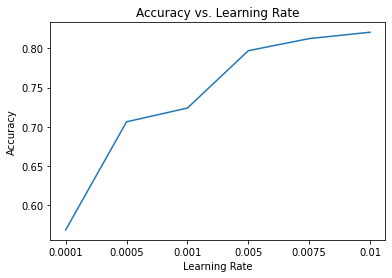

In [80]:
#Results: with softmax for final layer
LR_list = [0.0001, 0.0005, 0.001, 0.005, 0.0075, 0.01]
accuracy_list = [0.5689, 0.7065, 0.724, 0.797, 0.8124, 0.8205]
times = [-0.005110244000206876, -1.4107000424701255e-05, 0.002290139001161151, 3.0379997042473406e-06, 0.002505352000298444, 0.001273362000574707]

plt.plot(range(6),accuracy_list)
plt.xticks(range(6),labels=LR_list)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate');

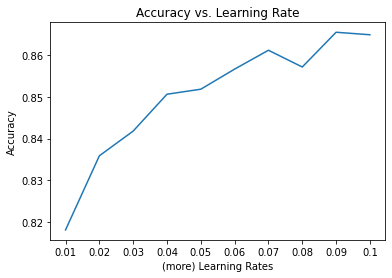

In [83]:
LR_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
acc_list = [0.8182, 0.8359, 0.8418, 0.8506, 0.8518, 0.8566, 0.8611, 0.8571, 0.8654, 0.8648]

plt.plot(range(10),acc_list)
plt.xticks(range(10),labels=LR_list)
plt.xlabel('(more) Learning Rates')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate');

In [84]:
#just to get the time
import time
start=time.time()
model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(100, activation ='sigmoid'),
            tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.09),
            loss='SparseCategoricalCrossentropy',
            metrics=['accuracy'])

model.fit(train_images, train_labels,batch_size=50,epochs=15)
probs = model.predict(test_images)
preds=np.argmax(probs,axis=1)
end=time.time()
print(end-start)

Epoch 1/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.7699 - accuracy: 0.7498
Epoch 2/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5072 - accuracy: 0.8206
Epoch 3/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4594 - accuracy: 0.8357
Epoch 4/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.8459
Epoch 5/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4162 - accuracy: 0.8519
Epoch 6/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4030 - accuracy: 0.8557
Epoch 7/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3908 - accuracy: 0.8599
Epoch 8/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3821 - accuracy: 0.8638
Epoch 9/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3732 - accuracy: 0.8663
Epoch 10/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.366